In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn_pandas import DataFrameMapper
from sklearn.preprocessing import OneHotEncoder

In [2]:
data = pd.read_csv('train_data.csv')
data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,41-50,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,81-90,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,71-80,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,11-20,3761.0,11-20


### No duplicate rows present

In [3]:
duplicate_values = data.duplicated()
for i in duplicate_values:
    if i == True:
        print(i)

In [4]:
for i in data.columns:
    print(i,data[i].nunique())

case_id 318438
Hospital_code 32
Hospital_type_code 7
City_Code_Hospital 11
Hospital_region_code 3
Available Extra Rooms in Hospital 18
Department 5
Ward_Type 6
Ward_Facility_Code 6
Bed Grade 4
patientid 92017
City_Code_Patient 37
Type of Admission 3
Severity of Illness 3
Visitors with Patient 28
Age 10
Admission_Deposit 7300
Stay 11


In [5]:
data.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                   object
Admission_Deposit                    float64
Stay                                  object
dtype: object

### Converting range present in age column to a number(mean)

In [6]:
new_age_column = list()
age_column = data['Age']
for s in age_column:
    if(s[0] != '0'):
        new_age = (int(s[0:2])+int(s[3:5]))//2
    else:
        new_age = int(s[2:4])//2
    new_age_column.append(new_age)
data['Age'] = new_age_column

In [7]:
data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,55,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,55,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,55,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,55,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,55,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,45,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,85,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,75,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,15,3761.0,11-20


# Checking missing values

In [7]:
data.isnull().sum()

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

In [8]:
(data.isnull().sum()/(len(data)))*100

case_id                              0.000000
Hospital_code                        0.000000
Hospital_type_code                   0.000000
City_Code_Hospital                   0.000000
Hospital_region_code                 0.000000
Available Extra Rooms in Hospital    0.000000
Department                           0.000000
Ward_Type                            0.000000
Ward_Facility_Code                   0.000000
Bed Grade                            0.035486
patientid                            0.000000
City_Code_Patient                    1.423197
Type of Admission                    0.000000
Severity of Illness                  0.000000
Visitors with Patient                0.000000
Age                                  0.000000
Admission_Deposit                    0.000000
Stay                                 0.000000
dtype: float64

<Axes: >

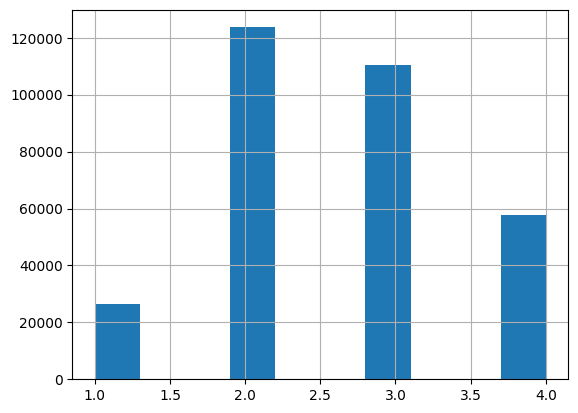

In [9]:
data['Bed Grade'].hist()

In [10]:
data['Bed Grade'].value_counts()

Bed Grade
2.0    123671
3.0    110583
4.0     57566
1.0     26505
Name: count, dtype: int64

<Axes: >

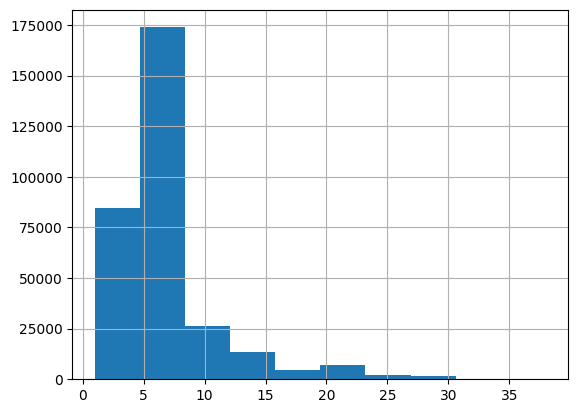

In [11]:
data['City_Code_Patient'].hist()

In [12]:
city_code_patient_mode = data['City_Code_Patient'].mode()
data['City_Code_Patient'] = data['City_Code_Patient'].fillna(city_code_patient_mode[0])

bed_grade_mode = data['Bed Grade'].mode()
data['Bed Grade']=data['Bed Grade'].fillna(value=bed_grade_mode[0])

In [13]:
data.isnull().sum()

case_id                              0
Hospital_code                        0
Hospital_type_code                   0
City_Code_Hospital                   0
Hospital_region_code                 0
Available Extra Rooms in Hospital    0
Department                           0
Ward_Type                            0
Ward_Facility_Code                   0
Bed Grade                            0
patientid                            0
City_Code_Patient                    0
Type of Admission                    0
Severity of Illness                  0
Visitors with Patient                0
Age                                  0
Admission_Deposit                    0
Stay                                 0
dtype: int64

### Filled missing data in City_Code_Patient and Bed Grade with mode 

In [14]:
data.dtypes

case_id                                int64
Hospital_code                          int64
Hospital_type_code                    object
City_Code_Hospital                     int64
Hospital_region_code                  object
Available Extra Rooms in Hospital      int64
Department                            object
Ward_Type                             object
Ward_Facility_Code                    object
Bed Grade                            float64
patientid                              int64
City_Code_Patient                    float64
Type of Admission                     object
Severity of Illness                   object
Visitors with Patient                  int64
Age                                    int64
Admission_Deposit                    float64
Stay                                  object
dtype: object

In [15]:
data

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,55,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,55,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,55,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,55,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,55,5558.0,41-50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318433,318434,6,a,6,X,3,radiotherapy,Q,F,4.0,86499,23.0,Emergency,Moderate,3,45,4144.0,11-20
318434,318435,24,a,1,X,2,anesthesia,Q,E,4.0,325,8.0,Urgent,Moderate,4,85,6699.0,31-40
318435,318436,7,a,4,X,3,gynecology,R,F,4.0,125235,10.0,Emergency,Minor,3,75,4235.0,11-20
318436,318437,11,b,2,Y,3,anesthesia,Q,D,3.0,91081,8.0,Trauma,Minor,5,15,3761.0,11-20


In [16]:
data_cat = data.select_dtypes(include = 'object').copy()
data_cat.head()

,Hospital_type_code,Hospital_region_code,Department,Ward_Type,Ward_Facility_Code,Type of Admission,Severity of Illness,Stay
0,c,Z,radiotherapy,R,F,Emergency,Extreme,0-10
1,c,Z,radiotherapy,S,F,Trauma,Extreme,41-50
2,e,X,anesthesia,S,E,Trauma,Extreme,31-40
3,b,Y,radiotherapy,R,D,Trauma,Extreme,41-50
4,b,Y,radiotherapy,S,D,Trauma,Extreme,41-50


In [17]:
data_cat['Hospital_region_code'].unique()

array(['Z', 'X', 'Y'], dtype=object)

<Axes: xlabel='Hospital_type_code', ylabel='Stay'>

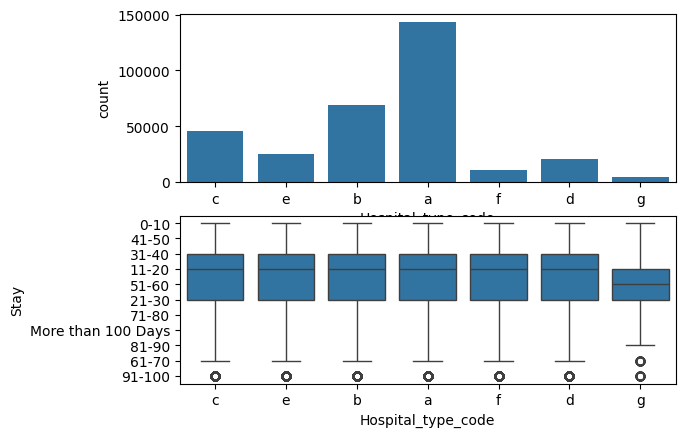

In [18]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = data_cat, x = 'Hospital_type_code', ax = ax1)

ax2 = fig.add_subplot(2,1,2)
sns.boxplot(data = data_cat, x='Hospital_type_code', y='Stay')


<Axes: xlabel='Hospital_region_code', ylabel='Stay'>

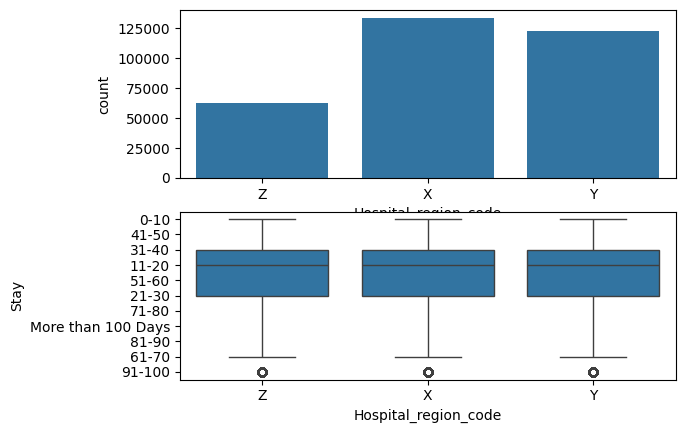

In [19]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = data_cat, x = 'Hospital_region_code', ax = ax1)

ax2 = fig.add_subplot(2,1,2)
sns.boxplot(data = data_cat, x='Hospital_region_code', y='Stay')


<Axes: xlabel='Department', ylabel='Stay'>

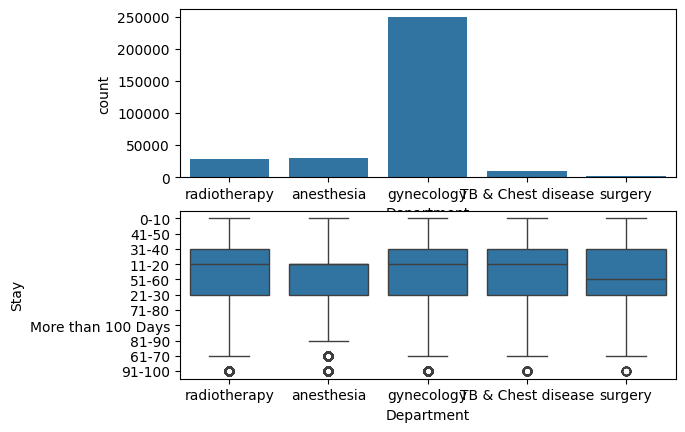

In [20]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = data_cat, x = 'Department', ax = ax1)

ax2 = fig.add_subplot(2,1,2)
sns.boxplot(data = data_cat, x='Department', y='Stay')

<Axes: xlabel='Ward_Type', ylabel='Stay'>

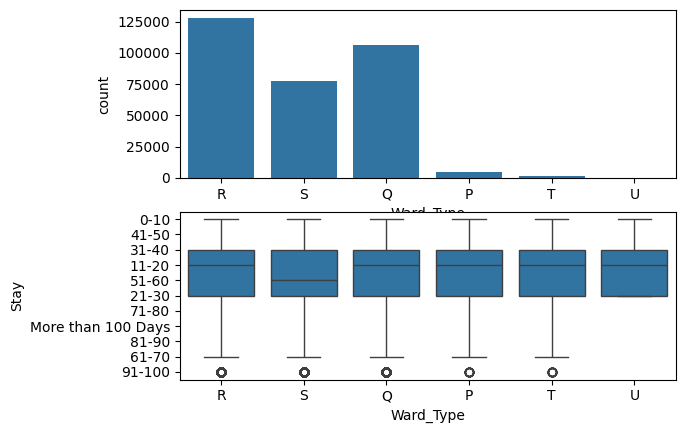

In [21]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = data_cat, x = 'Ward_Type', ax = ax1)

ax2 = fig.add_subplot(2,1,2)
sns.boxplot(data = data_cat, x='Ward_Type', y='Stay')

<Axes: xlabel='Ward_Facility_Code', ylabel='Stay'>

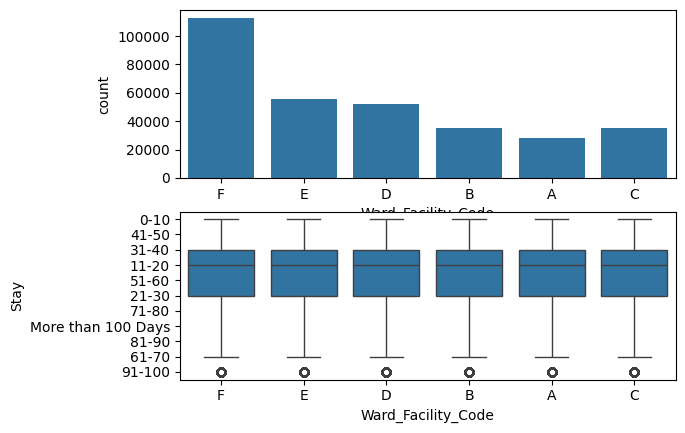

In [22]:

fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = data_cat, x = 'Ward_Facility_Code', ax = ax1)

ax2 = fig.add_subplot(2,1,2)
sns.boxplot(data = data_cat, x='Ward_Facility_Code', y='Stay')

<Axes: xlabel='Type of Admission', ylabel='Stay'>

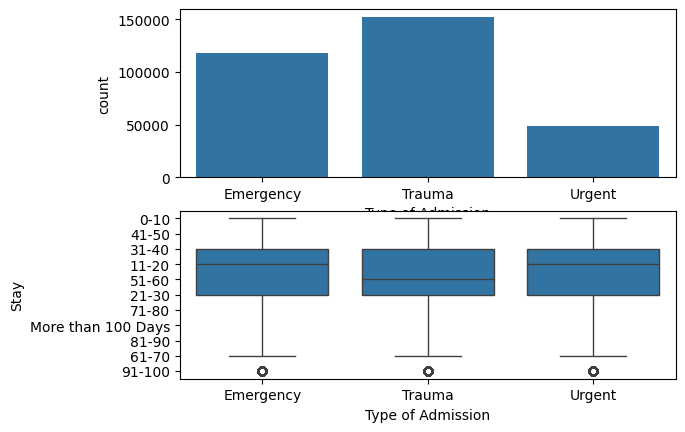

In [23]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = data_cat, x = 'Type of Admission', ax = ax1)

ax2 = fig.add_subplot(2,1,2)
sns.boxplot(data = data_cat, x='Type of Admission', y='Stay')

<Axes: xlabel='Severity of Illness', ylabel='Stay'>

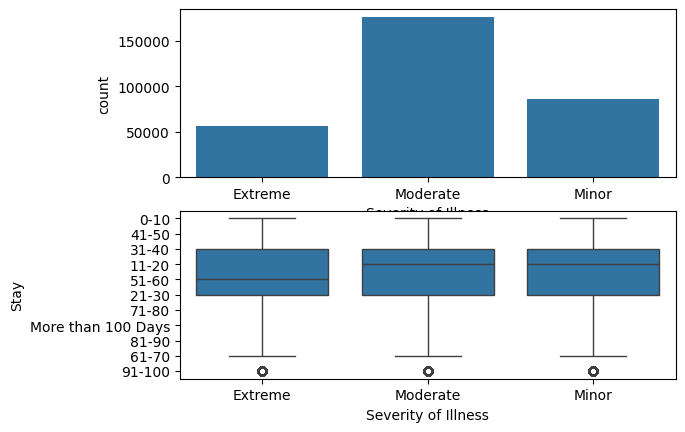

In [24]:
fig = plt.figure()

ax1 = fig.add_subplot(2,1,1) 
sns.countplot(data = data_cat, x = 'Severity of Illness', ax = ax1)

ax2 = fig.add_subplot(2,1,2)
sns.boxplot(data = data_cat, x='Severity of Illness', y='Stay')

In [27]:
ohe = OneHotEncoder(categories='auto')
feature_arr = ohe.fit_transform(data_cat[['Hospital_type_code','Hospital_region_code','Department','Ward_Type', 'Ward_Facility_Code']]).toarray()
feature_labels = ohe.categories_
feature_labels = np.array(feature_labels).ravel()
features = pd.DataFrame(feature_arr, columns=feature_labels)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (5,) + inhomogeneous part.